In [191]:
# import all libraries
import numpy as np
import pandas as pd

# pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [192]:
# load training and testing data
train_data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

In [193]:
# seperate training and testing labels
train_labels = train_data['label']
test_labels = test_data['label']

# seperate training and testing values
train_data = train_data.drop(labels='label', axis=1)
test_data = test_data.drop(labels='label', axis=1)

# convert all data frames to numpy arrays
train_labels = torch.LongTensor(train_labels.values)
train_data = torch.FloatTensor(train_data.values)
test_labels = torch.LongTensor(test_labels.values)
test_data = torch.FloatTensor(test_data.values)

In [194]:
# Model class, contains initializer and forward method
class Model(nn.Module):
    
    def __init__(self, features):
        # scalable network, dynamically creates layers based on python list (features)
        super().__init__()
        self.layers = nn.ParameterList(nn.Linear(features[i], features[i+1]) for i in range(len(features)-1))
        
        # making initial weights & biases smaller
        for layer in self.layers:
            with torch.no_grad():
                layer.weight.data *= 0.1
                layer.bias.data *= 0.1
            
    def forward(self, X):
        # loops through all but last layer to perform forward + ReLU calculations
        for layer in self.layers[:len(self.layers)-1]:
            X = F.relu(layer(X))
        X = self.layers[len(self.layers)-1](X) # last layer does not use ReLU
        return X
        
        

In [195]:
# create model
model = Model([784, 1000, 100, 10])

In [196]:
# cross entropy loss and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [197]:
epochs = 10
batch_size = 15
cost_list = []

for i in range(epochs):
    for j in range(batch_size):
        optimizer.zero_grad()
        predictions = model.forward(train_data)
        cost = criterion(predictions, train_labels)
        cost_list.append(cost.detach().numpy())
        cost.backward()
        optimizer.step()

    print(f'Epoch: {i}, Cost: {cost}')
    
    

Epoch: 0, Cost: 0.3553176522254944
Epoch: 1, Cost: 0.18205446004867554
Epoch: 2, Cost: 0.10272655636072159
Epoch: 3, Cost: 0.05885501950979233
Epoch: 4, Cost: 0.03362802416086197
Epoch: 5, Cost: 0.017591435462236404
Epoch: 6, Cost: 0.009095866233110428
Epoch: 7, Cost: 0.0048175230622291565
Epoch: 8, Cost: 0.002741551259532571
Epoch: 9, Cost: 0.001727488124743104


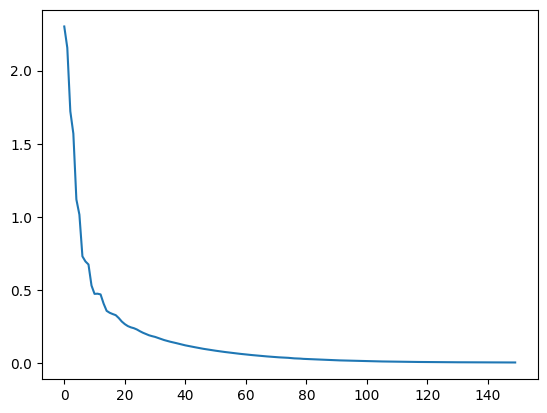

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs*batch_size), cost_list)

In [200]:
with torch.no_grad():
    pred = model.forward(test_data)
    error = criterion(pred, test_labels)
    
error.item()

0.08229181915521622

The image below is believed to be a: 8


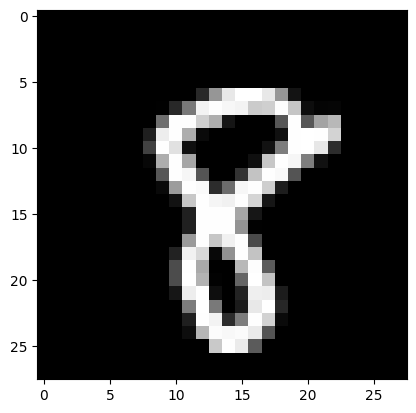

In [208]:
img = test_data[458]
plt.imshow(img.numpy().reshape(28,28), cmap='gray')

with torch.no_grad():
    num = model(img)
    num = np.argmax(num).item()
    print(f'The image below is believed to be a: {num}')

In [209]:
# Test how many we get right
correct = 0
with torch.no_grad():
    for i, img in enumerate(test_data):
        num = model(img)
        num = np.argmax(num).item()
        if (num == test_labels[i]):
            correct +=1
        
print(f'The model guessed {correct} correct')
print(f'This is a {(correct/10000)*100}% accuracy')
    

The model guessed 9788 correct
This is a 97.88% accuracy
